In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers


Using TensorFlow backend.


In [2]:
#User Parametrer
max_its = 10000
batch   = 50
alpha   = 1e-3
r       = .05
width   = 50

In [3]:
#Load data
from tensorflow.keras.datasets import mnist
(x_train_im, y_train), (x_test_im, y_test) = mnist.load_data()
x_train = x_train_im.astype('float32') / 255.
x_test  = x_test_im.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test  = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [4]:
#Keras Model
input_1 = keras.Input(shape=(28**2), name='Input_1')
input_2 = keras.Input(shape=(28**2), name = 'Input_2')

#Branch 1
x = layers.Dense(width, activation='relu')(input_1)#What is width
x = layers.Dense(width, activation='relu')(x)
z1 = layers.Dense(width, activation='relu')(x)
#2
x = layers.Dense(width, activation='relu')(input_2)
x = layers.Dense(width, activation='relu')(x)
z2 = layers.Dense(width, activation='relu')(x)

#Concat
z = keras.layers.concatenate([z1, z2])
z = layers.Dense(width, activation='relu')(z)

#Sum
x = layers.Dense(width, activation='elu', name='Sum_Branch')(z)
x = layers.Dense(width, activation='elu')(x)
x = layers.Dense(width, activation='elu')(x)
pred_sum = layers.Dense(1, activation='linear')(x)

#Loss
y1 = keras.Input(shape=(1), name='Value1')
y2 = keras.Input(shape=(1), name='Value2')
true_sum  = keras.layers.Add(name='Sum_Soln')([y1,y2])
Error = keras.layers.Subtract()([true_sum,pred_sum])
AbsError = tf.norm(keras.backend.abs(Error))#There is no absolute value layer, but we can alwasy call tensorflow from back end

In [5]:
#Define Models
train_model = keras.Model(inputs = [input_1, input_2, y1, y2], outputs = AbsError, name = 'Trainer') 
pred_model  = keras.Model(inputs = [input_1, input_2], outputs = pred_sum, name = 'Trainer') 


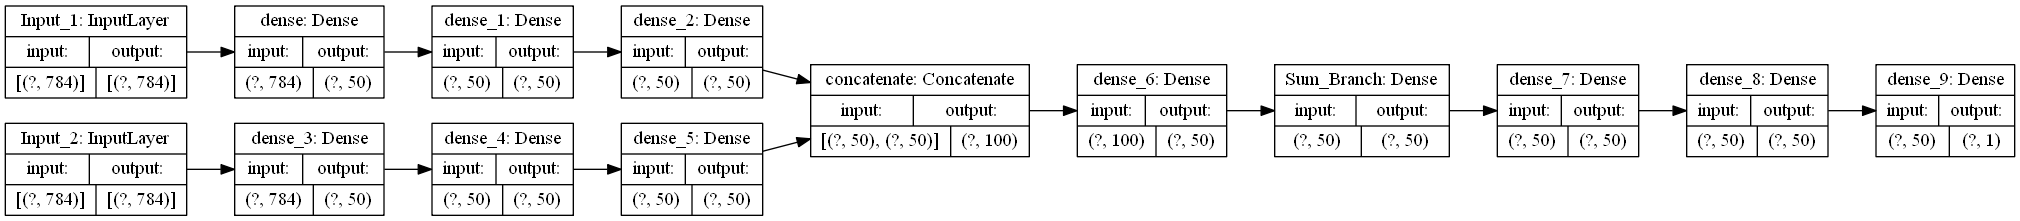

In [6]:
#Plot Models
keras.utils.plot_model(pred_model, 'E:/Dropbox/Research/ManifoldLearning/temp.png', expand_nested=True, rankdir='LR', show_shapes=True)


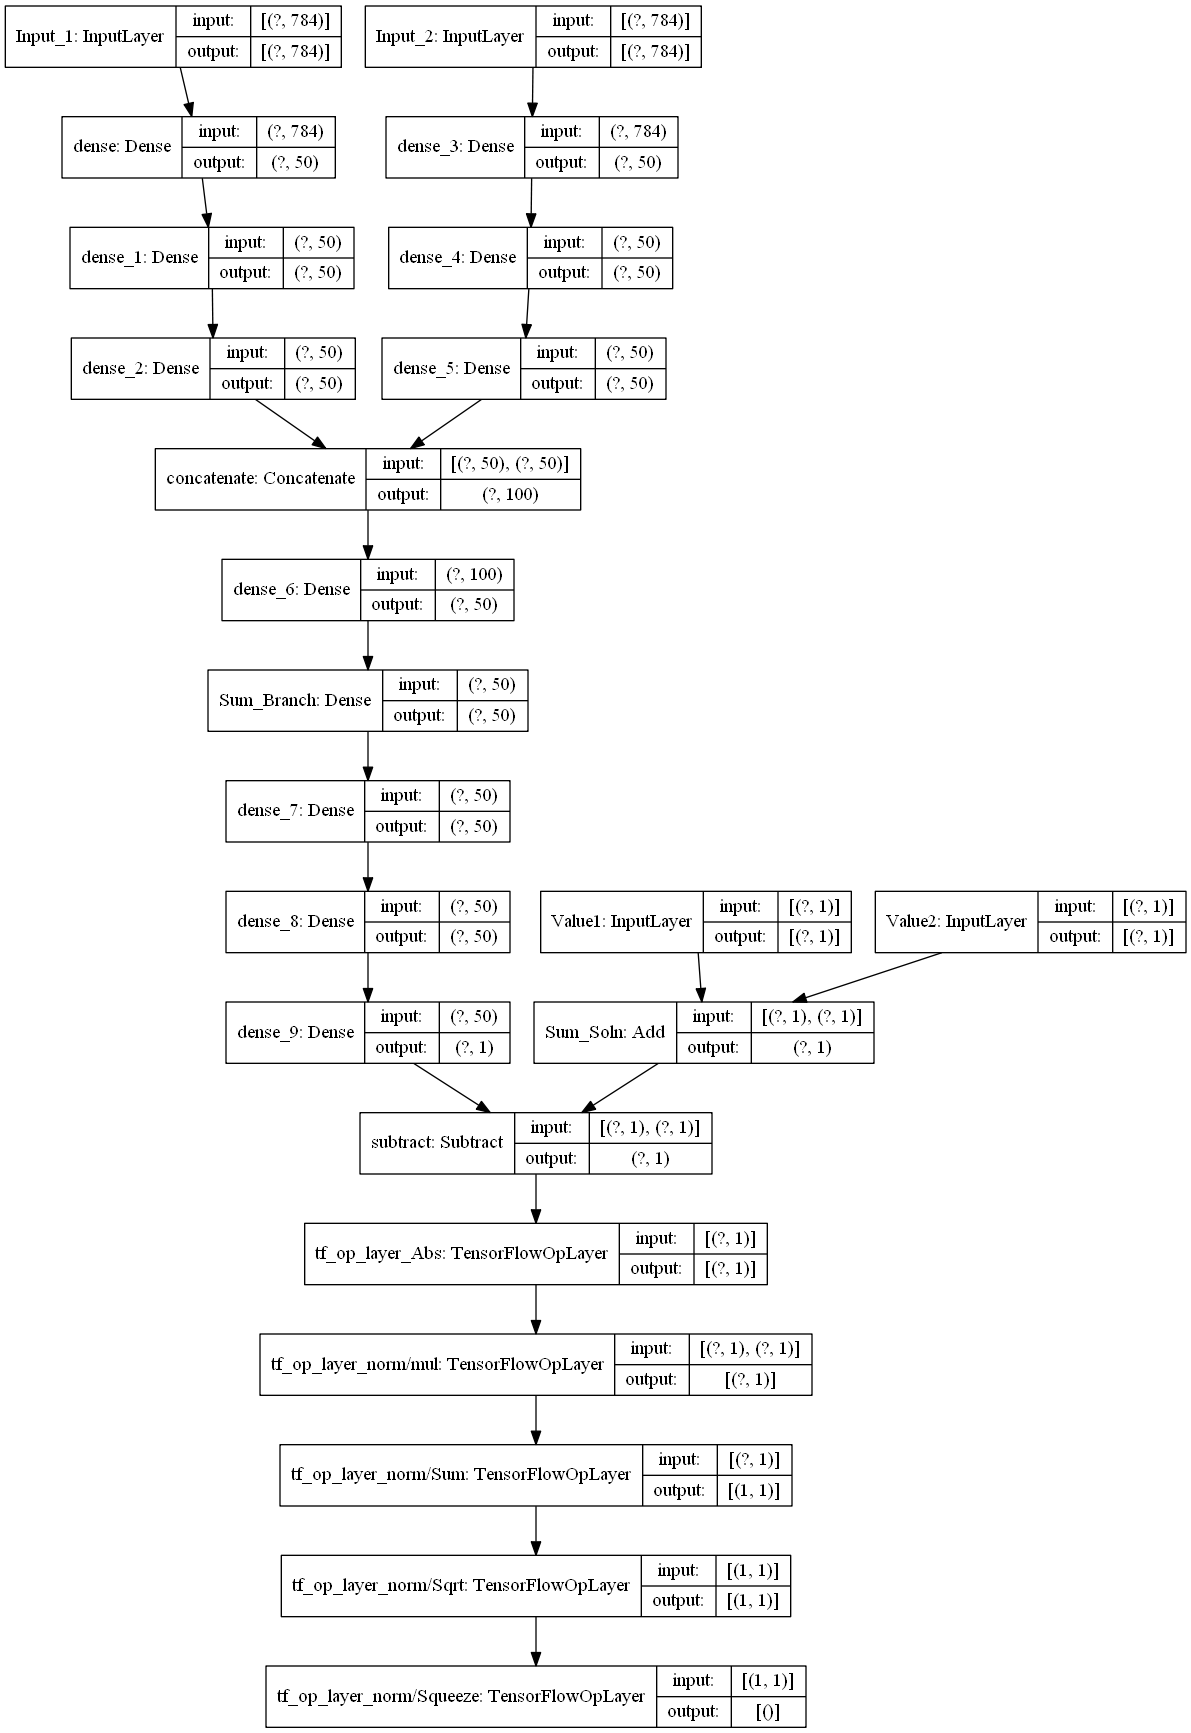

In [7]:
keras.utils.plot_model(train_model, 'E:/Dropbox/Research/ManifoldLearning/temp.png', expand_nested=True, rankdir='UD', show_shapes=True)


In [8]:
#Compile Model
optimizer = keras.optimizers.Adam(3e-4)#ADAM
train_model.add_loss(AbsError)
train_model.compile(optimizer=optimizer)

In [9]:
train_shuffle = np.arange(60000)
np.random.shuffle(train_shuffle)
x_train2 = np.squeeze(x_train[train_shuffle,:])
y_train2 = np.squeeze(y_train[train_shuffle])


In [10]:
#train model
train_log = train_model.fit([x_train,x_train2,y_train,y_train2],
                epochs= 100,
                batch_size=500,
                shuffle=True)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 47us/sample - loss: 112.3973
Epoch 2/100
60000/60000 [==============================] - 1s 13us/sample - loss: 56.1564
Epoch 3/100
60000/60000 [==============================] - 1s 14us/sample - loss: 42.5054
Epoch 4/100
60000/60000 [==============================] - 1s 13us/sample - loss: 36.2491
Epoch 5/100
60000/60000 [==============================] - 1s 13us/sample - loss: 32.8053
Epoch 6/100
60000/60000 [==============================] - 1s 13us/sample - loss: 30.5306
Epoch 7/100
60000/60000 [==============================] - 1s 13us/sample - loss: 28.9283
Epoch 8/100
60000/60000 [==============================] - 1s 14us/sample - loss: 27.6836
Epoch 9/100
60000/60000 [==============================] - 1s 13us/sample - loss: 26.6341
Epoch 10/100
60000/60000 [==============================] - 1s 14us/sample - loss: 25.5852
Epoch 11/100
60000/60000 [==============================] - 1s 13us/sample 

60000/60000 [==============================] - 1s 13us/sample - loss: 7.8397
Epoch 92/100
60000/60000 [==============================] - 1s 13us/sample - loss: 7.8550
Epoch 93/100
60000/60000 [==============================] - 1s 13us/sample - loss: 7.8094
Epoch 94/100
60000/60000 [==============================] - 1s 13us/sample - loss: 7.5979
Epoch 95/100
60000/60000 [==============================] - 1s 13us/sample - loss: 7.5623
Epoch 96/100
60000/60000 [==============================] - 1s 13us/sample - loss: 7.5257
Epoch 97/100
60000/60000 [==============================] - 1s 14us/sample - loss: 7.4588
Epoch 98/100
60000/60000 [==============================] - 1s 14us/sample - loss: 7.5806
Epoch 99/100
60000/60000 [==============================] - 1s 14us/sample - loss: 7.5036
Epoch 100/100
60000/60000 [==============================] - 1s 14us/sample - loss: 7.4449


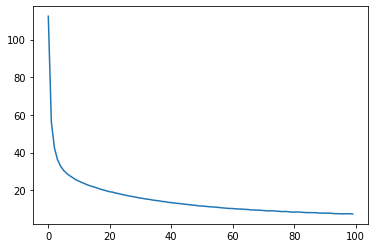

In [11]:
plt.plot(train_log.history['loss'], label='train')
plt.show()

In [12]:
#Check some results
test_shuffle = np.arange(x_test.shape[0])
np.random.shuffle(test_shuffle)
x_test2 = np.squeeze(x_test[test_shuffle,:])
x_test_im2 = np.squeeze(x_test_im[test_shuffle,:,:])
test_sum = pred_model.predict([x_test,x_test2])


[6.2276464]


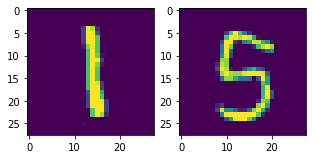

In [15]:
fig = plt.figure(figsize=(5,10))
i = np.random.randint(10000)
plt.subplot(1,2,1)
plt.imshow(x_test_im[i,:])
plt.subplot(1,2,2)
plt.imshow(x_test_im2[i,:])
print(test_sum[i])